# Preface
In my last assignment I used Go Lang. In hindsight, this was a poor decision because Go is still a very young language with a developing ecosystem. The package I used for the last assignment, GoLearn[1], was great for educational purposes and the task at hand but inadequete when attempting any further complex data science. Considering this, I decided to jump into the mature Scikit-Learn[2] and Python in my long journey from Go to R and back to Go.

# Question

Construct learning curves for the two classification algorithms that you used in Assignment 1. A description of your methodology to construct learning curves, including any assumptions you made and procedures you followed. If using a package that does the work for you, explain what it does in sufficient detail to demonstrate your clear understanding of it [4 marks].

Graphs of the learning curves for each of the two algorithms [1.5 x2 = 3 marks].
A discussion of your observations from examining the two learning curves, individually and/or taken together. You must make 6 separate observations and will score up to 0.5 marks for each observation that is appropriately discussed and backed up by evidence [0.5 x6 = 3 marks].

# Import 
First let's input our data and libraries. Use `pandas` to read the CSV data into a `DataFrame` for easy manipulation. Next, we separate our class and attribute columns for use in the classification step.

In [1]:
%matplotlib inline

import pandas 
import numpy as np
from pylab import *
from sklearn.learning_curve import learning_curve

# Import the CSV data
data = pandas.read_csv('./data/illness-mapped.csv')

class_name = "test_result"
attributes = list(set(data.columns.values) - set([class_name]))

# Learning Curves
To get the learning curve of any classification, we need to plot the accuracy of the classifier versus the increase in size of the training set. This involves iteratively increasing the size of the training set (and thus decreasing the size of the testing set) as long as $|S_{train}| > 1$ and $|S_{test}| > 1$.

## k-Nearest Neighbour (KNN)
First, we'll plot the learning curve of the k-Nearest Neighbour algorithm with dataset $D$. We create the learning curve by first generating our $X$ values. This is an array of values $\{\sigma \leqslant X_n \leqslant 1 - \sigma\}$ where $\sigma = 0.01$ and is also the interval between values. Next, we loop over each value in $X$ to generate our $Y$ values. For each value in $X$, we split our data into two sets $S_{train}$ and $S_{test}$ where $|S_{train}| = X_n\times|D|$ and $|S_{test}| = |D| - |S_{train}|$. We then train our classifier using $S_{train}$ and test with $S_{test}$. $Y_n$ is the accuracy of the classifier at predicting the data. Once we have our $X$ and $Y$, we simple plot $X$ versus $Y$ to give us our learning curve.

The following code will create our learning curve. We'll define a simple `generate_learning_curve` function where we pass a `classifier`, `data` and an optional `interval` for reuse. This function returns our $X$ and $Y$ values for plotting.

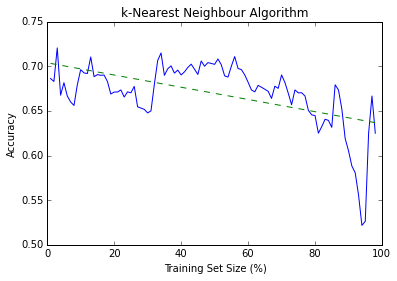

In [14]:
from sklearn.neighbors import KNeighborsClassifier
        
x, y = learning_curve(KNeighborsClassifier(n_neighbors = 3), data)

# Output the plot with line of best fit
plot(x, y, '-', x, np.poly1d(np.polyfit(x, y, 1))(x), '--')
xlabel("Training Set Size (%)")
ylabel("Accuracy")
title("k-Nearest Neighbour Algorithm")
show()

## Linear Support Vector Machine (SVM)
Now, onto our Linear Support Vector Machine. We import and pass our `LinearSVC` to `generate_learning_curve` function and output our learning curve.

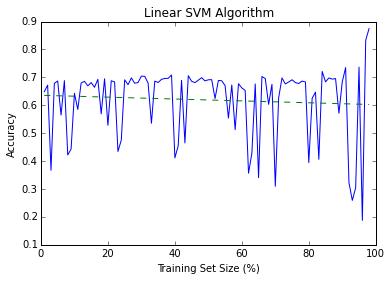

In [22]:
from sklearn.svm import LinearSVC

x, y = generate_learning_curve(LinearSVC(random_state = 200), data)

# Output the plot with line of best fit
plot(x, y, '-', x, np.poly1d(np.polyfit(x, y, 1))(x), '--')
xlabel("Training Set Size (%)")
ylabel("Accuracy")
title("Linear SVM Algorithm")
show()

# Observations